#### Import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

## Part 1: Using Item Sales from Quickbooks

#### Create new csv for combined data

In [2]:
files = [file for file in os.listdir('static/data/quickbooks_data/qb_2020_sales_item/months')]

all_months_data = pd.DataFrame()
months_file_order = [4,2,1,6,3,5]
month_order_count = 0
for file in files:
    df = pd.read_csv('static/data/quickbooks_data/qb_2020_sales_item/months/' + file,thousands=',')
    df['Month'] = months_file_order[month_order_count]
    month_order_count += 1
    all_months_data = pd.concat([all_months_data,df])
all_months_data.to_csv('static/data/cleaned_data/mnm_all_months_2020_qb_sales_item.csv')

#### Cleaning Data

In [3]:
all_months_data = pd.read_csv('static/data/cleaned_data/mnm_all_months_2020_qb_sales_item.csv')
all_months_data.head()

,Unnamed: 0,Inventory,Qty,Amount,% of Sales,Avg Price,COGS,Avg COGS,Gross Margin,Gross Margin %,Month
0,0,"DPBOX (DISPLAY BOX, WHITE (PC/50PCS))",0.0,0.0,0.0%,0.00,0.0,0.00,0.0,0.0%,4
1,1,IN5011 (MESH WIG CAP (DOME STYLE) : BK (PC/288...,288.0,122.4,0.0%,0.43,122.4,0.43,0.0,0.0%,4
2,2,"IN5011-3 (MESH WIG CAP (DOME STYLE) : BK, 3PCS...",196.0,0.0,0.0%,0.00,249.9,1.28,-249.9,100.0%,4
3,3,IN5017 (SPANDEX DOME CAP : BLACK (PC/288PCS)),216.0,48.0,0.0%,0.22,72.0,0.33,-24.0,-50.0%,4
4,4,"IN5017-3 (SPANDEX DOME CAP : BLACK, 3PCS (PK/9...",192.0,192.0,0.0%,1.00,192.0,1.00,0.0,0.0%,4


In [4]:
all_months_data['Year']=2020

In [5]:
all_months_data.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
all_months_data.dtypes

Inventory          object
Qty               float64
Amount            float64
% of Sales         object
Avg Price         float64
COGS              float64
Avg COGS          float64
Gross Margin      float64
Gross Margin %     object
Month               int64
Year                int64
dtype: object

In [7]:
nan_df = all_months_data[all_months_data.isna().any(axis=1)]
nan_df.head()

,Inventory,Qty,Amount,% of Sales,Avg Price,COGS,Avg COGS,Gross Margin,Gross Margin %,Month,Year
3460,"Q5088 (ELASTIC WIG BAND, 1-1/8"" X 5YD ROLL : B...",0.0,6.0,0.0%,NaN,0.0,0.0,6.0,100.0%,3,2020
3461,"Q5089 (ELASTIC WIG BAND, 1-1/8"" X 5YD ROLL : B...",0.0,6.0,0.0%,NaN,0.0,0.0,6.0,100.0%,3,2020
3468,"Q5098 (SILICONE DOT WIG GRIP, 1-3/4"" X 17-3/4""...",0.0,6.0,0.0%,NaN,0.0,0.0,6.0,100.0%,3,2020
3469,"Q5099 (SILICONE DOT WIG GRIP, 1-3/4"" X 17-3/4""...",0.0,33.0,0.0%,NaN,0.0,0.0,33.0,100.0%,3,2020


In [8]:
all_months_data.fillna(0,inplace=True)

In [9]:
nan_df = all_months_data[all_months_data.isna().any(axis=1)]
nan_df.head()

,Inventory,Qty,Amount,% of Sales,Avg Price,COGS,Avg COGS,Gross Margin,Gross Margin %,Month,Year


#### What month had the largest sales?

In [10]:
sum_by_month = all_months_data.groupby('Month').sum()

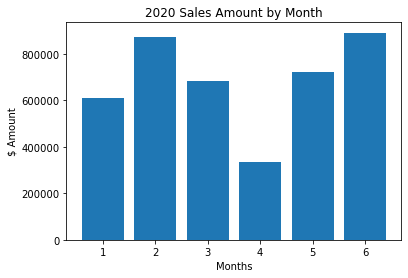

In [11]:
x = range(1,7)
y = sum_by_month['Amount']
plt.bar(x,y)
plt.xticks(x)
plt.xlabel('Months')
plt.ylabel('$ Amount')
plt.title('2020 Sales Amount by Month')
plt.show()

#### What are the top 10 items of the year?

In [12]:
inventory_sum = all_months_data.groupby('Inventory').sum()

In [13]:
inventory_sum_sorted_top_10 = inventory_sum.sort_values(by=['Amount'],ascending=False).iloc[0:10]

In [14]:
inventory_sum_sorted_top_10.reset_index(inplace=True)

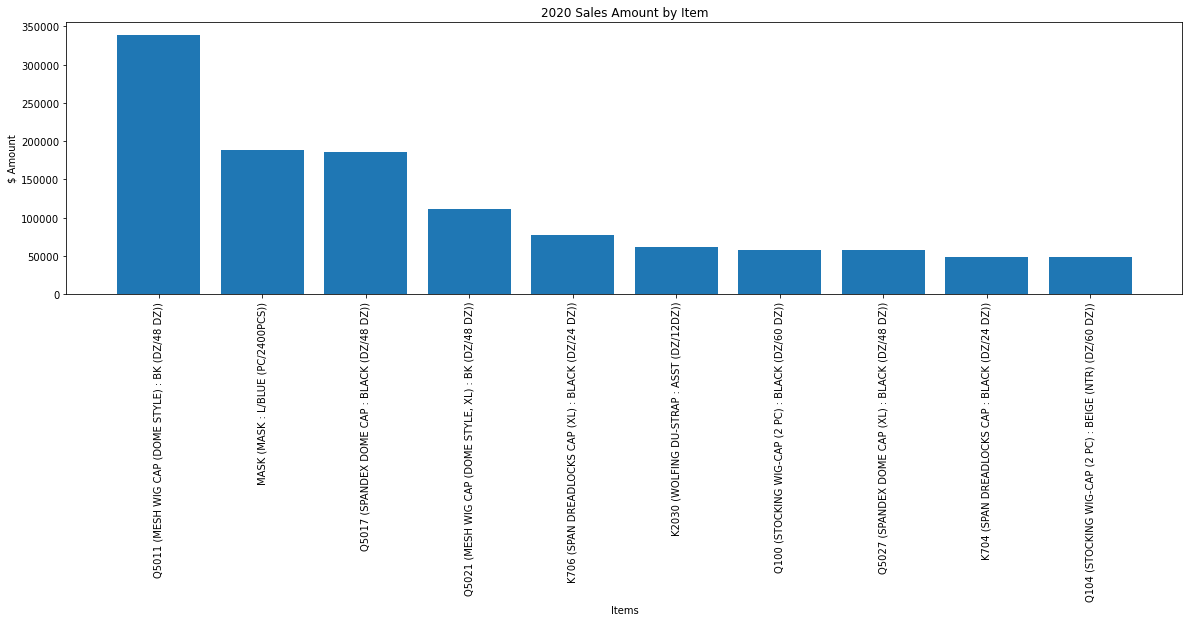

In [15]:
x = inventory_sum_sorted_top_10['Inventory']
y = inventory_sum_sorted_top_10['Amount']
plt.figure(figsize=[20,5])
plt.bar(x,y)
plt.xticks(x,rotation='vertical')
plt.xlabel('Items')
plt.ylabel('$ Amount')
plt.title('2020 Sales Amount by Item')
plt.show()

In [16]:
inventory_sum_sorted_worst_10 = inventory_sum.sort_values(by=['Amount']).iloc[0:10]

In [17]:
inventory_sum_sorted_worst_10.reset_index(inplace=True)

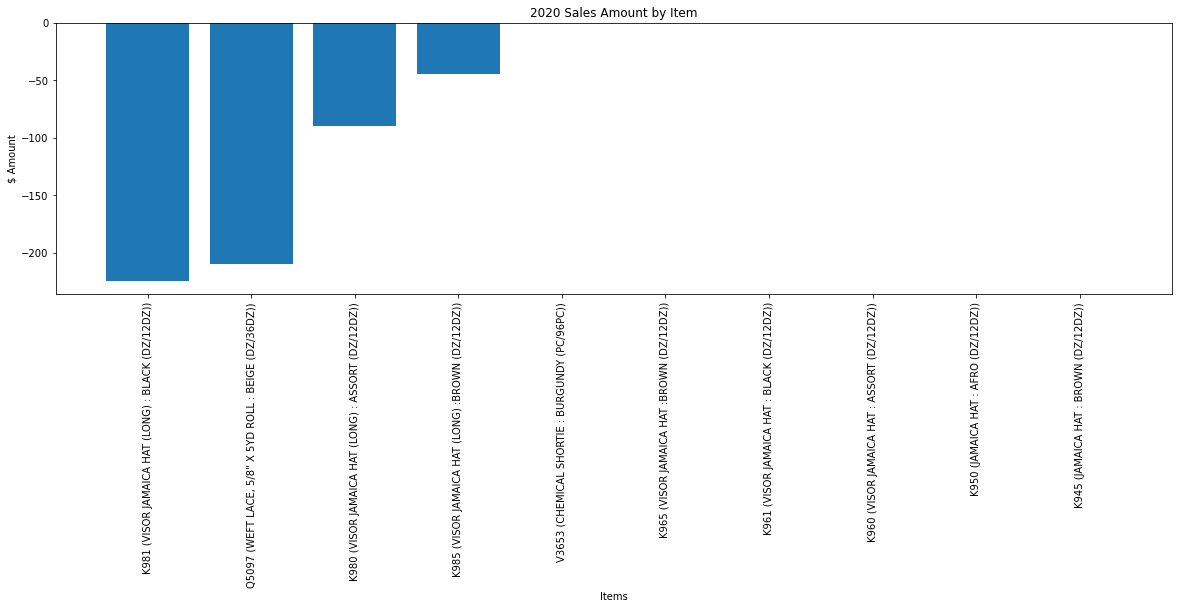

In [18]:
x = inventory_sum_sorted_worst_10['Inventory']
y = inventory_sum_sorted_worst_10['Amount']
plt.figure(figsize=[20,5])
plt.bar(x,y)
plt.xticks(x,rotation='vertical')
plt.xlabel('Items')
plt.ylabel('$ Amount')
plt.title('2020 Sales Amount by Item')
plt.show()

## Part 2: QB Sales Order from 2018-2020

#### Read in item detail summary

In [19]:
df = pd.read_csv('static/data/quickbooks_data/qb_history/qb_open_sales_orders_by_item.csv')
df

,Unnamed: 0,Type,Date,Due Date,Num,Name,Qty,Invoiced,Backordered,Amount,Open Balance
0,Inventory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E1083 (ADHESIVE-STRIP LASH/CLEAR (7G)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Sales Order,01/18/2018,02/17/2018,A29136,PRIME CK,36.0,0.0,36.0,36.00,36.00
3,Total E1083 (ADHESIVE-STRIP LASH/CLEAR (7G)),NaN,NaN,NaN,NaN,NaN,36.0,0.0,36.0,36.00,36.00
4,K001 (DU-RAG : BLACK (DZ/48 DZ)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
20899,NaN,Sales Order,05/28/2020,05/28/2020,A33714,TYS BEAUTY SUPPLY,NaN,NaN,1.0,0.00,NaN
20900,NaN,Sales Order,06/25/2020,06/25/2020,A33885,SHEKINA IMPORT & EXPORT,NaN,NaN,1.0,0.00,NaN
20901,Total FREIGHT D/C 50% (FREIGHT DISCOUNT 50%),NaN,NaN,NaN,NaN,NaN,0.0,0.0,21.0,0.00,0.00
20902,Total Discounts,NaN,NaN,NaN,NaN,NaN,0.0,0.0,3309.0,-773347.33,-100925.15


In [20]:
df.rename(columns={'Unnamed: 0':'Inventory'},inplace=True)

In [21]:
df.drop([0],inplace=True)

In [22]:
df.reset_index(inplace=True,drop=True)

In [23]:
df.tail()

,Inventory,Type,Date,Due Date,Num,Name,Qty,Invoiced,Backordered,Amount,Open Balance
20898,NaN,Sales Order,05/28/2020,05/28/2020,A33714,TYS BEAUTY SUPPLY,NaN,NaN,1.0,0.00,NaN
20899,NaN,Sales Order,06/25/2020,06/25/2020,A33885,SHEKINA IMPORT & EXPORT,NaN,NaN,1.0,0.00,NaN
20900,Total FREIGHT D/C 50% (FREIGHT DISCOUNT 50%),NaN,NaN,NaN,NaN,NaN,0.0,0.0,21.0,0.00,0.00
20901,Total Discounts,NaN,NaN,NaN,NaN,NaN,0.0,0.0,3309.0,-773347.33,-100925.15
20902,TOTAL,NaN,NaN,NaN,NaN,NaN,350861.0,40324.0,313870.0,2154828.41,2517122.17


In [24]:
part_beg_index = df.loc[df['Inventory']=='Total Inventory'].reset_index()['index'][0]
part_beg_index

17460

In [25]:
part_end_index=len(df)
part_end_index

20903

In [26]:
list_drop = np.arange(part_beg_index,part_end_index,1)
list_drop

array([17460, 17461, 17462, ..., 20900, 20901, 20902], dtype=int64)

#### Drop all rows not inventory related

In [27]:
inventory_df = df.drop(list_drop)
inventory_df

,Inventory,Type,Date,Due Date,Num,Name,Qty,Invoiced,Backordered,Amount,Open Balance
0,E1083 (ADHESIVE-STRIP LASH/CLEAR (7G)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Sales Order,01/18/2018,02/17/2018,A29136,PRIME CK,36.0,0.0,36.0,36.0,36.0
2,Total E1083 (ADHESIVE-STRIP LASH/CLEAR (7G)),NaN,NaN,NaN,NaN,NaN,36.0,0.0,36.0,36.0,36.0
3,K001 (DU-RAG : BLACK (DZ/48 DZ)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Sales Order,05/17/2018,06/16/2018,A29794,BEN'S (MD) BEAUTY SUPPLY DISTRIBUTOR INC.,20.0,0.0,20.0,80.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...
17455,NaN,Sales Order,04/23/2018,06/22/2018,A29662,"WURI, INC.",2.0,0.0,2.0,42.0,42.0
17456,NaN,Sales Order,08/24/2018,10/23/2018,A30272,"WURI, INC.",3.0,0.0,3.0,63.0,63.0
17457,NaN,Sales Order,04/10/2020,04/10/2020,A33401,HAIR GALLERIA BEAUTY SUPPLY,1.0,0.0,1.0,28.0,28.0
17458,NaN,Sales Order,05/12/2020,05/12/2020,A33596,HAIR GALLERIA BEAUTY SUPPLY,10.0,0.0,10.0,280.0,280.0


#### Inventory List

In [28]:
inventory_list = inventory_df['Inventory'].dropna()
inventory_list.reset_index(inplace=True,drop=True)
inventory_list

0                  E1083 (ADHESIVE-STRIP LASH/CLEAR (7G))
1            Total E1083 (ADHESIVE-STRIP LASH/CLEAR (7G))
2                        K001 (DU-RAG : BLACK (DZ/48 DZ))
3                  Total K001 (DU-RAG : BLACK (DZ/48 DZ))
4                        K002 (DU-RAG : WHITE (DZ/48 DZ))
                              ...                        
1421    Total W784 (SOFT TAG CLEAR ROUND : 1000 PCS (R...
1422    W790 (HARD TAG (48X42 100PC) : BLACK (PACK/10 ...
1423    Total W790 (HARD TAG (48X42 100PC) : BLACK (PA...
1424          W793 (PIN : 27MM (1000 PCS) (PACK/10 PACK))
1425    Total W793 (PIN : 27MM (1000 PCS) (PACK/10 PACK))
Name: Inventory, Length: 1426, dtype: object

In [29]:
full_inventory_list = inventory_df['Inventory'].fillna(0)
full_inventory_list

0                   E1083 (ADHESIVE-STRIP LASH/CLEAR (7G))
1                                                        0
2             Total E1083 (ADHESIVE-STRIP LASH/CLEAR (7G))
3                         K001 (DU-RAG : BLACK (DZ/48 DZ))
4                                                        0
                               ...                        
17455                                                    0
17456                                                    0
17457                                                    0
17458                                                    0
17459    Total W793 (PIN : 27MM (1000 PCS) (PACK/10 PACK))
Name: Inventory, Length: 17460, dtype: object

#### Loop function to fill all empty values in Inventory column with the previous item

In [30]:
j=-1
for i in range(len(full_inventory_list)):
    if full_inventory_list[i] == 0:
        full_inventory_list[i] = inventory_list[j]
    else:
        j += 1

In [31]:
full_inventory_list

0                   E1083 (ADHESIVE-STRIP LASH/CLEAR (7G))
1                   E1083 (ADHESIVE-STRIP LASH/CLEAR (7G))
2             Total E1083 (ADHESIVE-STRIP LASH/CLEAR (7G))
3                         K001 (DU-RAG : BLACK (DZ/48 DZ))
4                         K001 (DU-RAG : BLACK (DZ/48 DZ))
                               ...                        
17455          W793 (PIN : 27MM (1000 PCS) (PACK/10 PACK))
17456          W793 (PIN : 27MM (1000 PCS) (PACK/10 PACK))
17457          W793 (PIN : 27MM (1000 PCS) (PACK/10 PACK))
17458          W793 (PIN : 27MM (1000 PCS) (PACK/10 PACK))
17459    Total W793 (PIN : 27MM (1000 PCS) (PACK/10 PACK))
Name: Inventory, Length: 17460, dtype: object

In [32]:
inventory_df['Inventory'] = full_inventory_list

In [33]:
inventory_df

,Inventory,Type,Date,Due Date,Num,Name,Qty,Invoiced,Backordered,Amount,Open Balance
0,E1083 (ADHESIVE-STRIP LASH/CLEAR (7G)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E1083 (ADHESIVE-STRIP LASH/CLEAR (7G)),Sales Order,01/18/2018,02/17/2018,A29136,PRIME CK,36.0,0.0,36.0,36.0,36.0
2,Total E1083 (ADHESIVE-STRIP LASH/CLEAR (7G)),NaN,NaN,NaN,NaN,NaN,36.0,0.0,36.0,36.0,36.0
3,K001 (DU-RAG : BLACK (DZ/48 DZ)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,K001 (DU-RAG : BLACK (DZ/48 DZ)),Sales Order,05/17/2018,06/16/2018,A29794,BEN'S (MD) BEAUTY SUPPLY DISTRIBUTOR INC.,20.0,0.0,20.0,80.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...
17455,W793 (PIN : 27MM (1000 PCS) (PACK/10 PACK)),Sales Order,04/23/2018,06/22/2018,A29662,"WURI, INC.",2.0,0.0,2.0,42.0,42.0
17456,W793 (PIN : 27MM (1000 PCS) (PACK/10 PACK)),Sales Order,08/24/2018,10/23/2018,A30272,"WURI, INC.",3.0,0.0,3.0,63.0,63.0
17457,W793 (PIN : 27MM (1000 PCS) (PACK/10 PACK)),Sales Order,04/10/2020,04/10/2020,A33401,HAIR GALLERIA BEAUTY SUPPLY,1.0,0.0,1.0,28.0,28.0
17458,W793 (PIN : 27MM (1000 PCS) (PACK/10 PACK)),Sales Order,05/12/2020,05/12/2020,A33596,HAIR GALLERIA BEAUTY SUPPLY,10.0,0.0,10.0,280.0,280.0


#### Drop rows that aren't sales orders (total rows & empty rows)

In [34]:
inventory_df.dropna(subset=['Type'],inplace=True)

In [35]:
inventory_df.reset_index(drop=True,inplace=True)

In [36]:
inventory_df['Type'].value_counts()

Sales Order    16034
Name: Type, dtype: int64

In [37]:
inventory_df.dtypes

Inventory        object
Type             object
Date             object
Due Date         object
Num              object
Name             object
Qty             float64
Invoiced        float64
Backordered     float64
Amount          float64
Open Balance    float64
dtype: object

#### Add month and year column using date column

In [38]:
inventory_df['Month'] = inventory_df['Date'].str[0:2].astype('int32')
inventory_df['Year'] = inventory_df['Date'].str[6:10].astype('int32')

In [39]:
inventory_df

,Inventory,Type,Date,Due Date,Num,Name,Qty,Invoiced,Backordered,Amount,Open Balance,Month,Year
0,E1083 (ADHESIVE-STRIP LASH/CLEAR (7G)),Sales Order,01/18/2018,02/17/2018,A29136,PRIME CK,36.0,0.0,36.0,36.0,36.0,1,2018
1,K001 (DU-RAG : BLACK (DZ/48 DZ)),Sales Order,05/17/2018,06/16/2018,A29794,BEN'S (MD) BEAUTY SUPPLY DISTRIBUTOR INC.,20.0,0.0,20.0,80.0,80.0,5,2018
2,K001 (DU-RAG : BLACK (DZ/48 DZ)),Sales Order,05/21/2018,06/20/2018,A29812,BEAUTY ELEMENTS,48.0,0.0,48.0,192.0,192.0,5,2018
3,K001 (DU-RAG : BLACK (DZ/48 DZ)),Sales Order,05/21/2018,06/20/2018,A29821,BEN'S (PA) BEAUTY SUPPLY DISTRIBUTOR INC.,12.0,0.0,12.0,48.0,48.0,5,2018
4,K001 (DU-RAG : BLACK (DZ/48 DZ)),Sales Order,05/21/2018,06/20/2018,A29823,C&L TRADING OF MIAMI,144.0,0.0,144.0,576.0,576.0,5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16029,W790 (HARD TAG (48X42 100PC) : BLACK (PACK/10 ...,Sales Order,04/10/2020,04/10/2020,A33401,HAIR GALLERIA BEAUTY SUPPLY,20.0,10.0,10.0,280.0,140.0,4,2020
16030,W793 (PIN : 27MM (1000 PCS) (PACK/10 PACK)),Sales Order,04/23/2018,06/22/2018,A29662,"WURI, INC.",2.0,0.0,2.0,42.0,42.0,4,2018
16031,W793 (PIN : 27MM (1000 PCS) (PACK/10 PACK)),Sales Order,08/24/2018,10/23/2018,A30272,"WURI, INC.",3.0,0.0,3.0,63.0,63.0,8,2018
16032,W793 (PIN : 27MM (1000 PCS) (PACK/10 PACK)),Sales Order,04/10/2020,04/10/2020,A33401,HAIR GALLERIA BEAUTY SUPPLY,1.0,0.0,1.0,28.0,28.0,4,2020


In [40]:
len(inventory_df)

16034

#### Remove outlier data (these sales were made before the new system was put in place)

In [41]:
inventory_df.loc[(inventory_df['Month']==7) & (inventory_df['Year']==2020)]
inventory_df.loc[(inventory_df['Month']==10) & (inventory_df['Year']==2020)]

,Inventory,Type,Date,Due Date,Num,Name,Qty,Invoiced,Backordered,Amount,Open Balance,Month,Year
9621,Q504 (WEAVING CAP (CLOSED TOP) : BLACK (DZ/48 ...,Sales Order,10/28/2020,11/12/2020,A33909,"BEAUTY MAX (CORPUS CHRISTI, TX)",48.0,0.0,48.0,360.0,360.0,10,2020
11430,Q556 (WEAVING CAP (CLOSED TOP) : BROWN (DZ/48 ...,Sales Order,10/28/2020,11/12/2020,A33909,"BEAUTY MAX (CORPUS CHRISTI, TX)",1.0,0.0,1.0,7.5,7.5,10,2020


In [42]:
inventory_df.drop([9621,11430,51,2196],inplace=True)

In [43]:
inventory_df

,Inventory,Type,Date,Due Date,Num,Name,Qty,Invoiced,Backordered,Amount,Open Balance,Month,Year
0,E1083 (ADHESIVE-STRIP LASH/CLEAR (7G)),Sales Order,01/18/2018,02/17/2018,A29136,PRIME CK,36.0,0.0,36.0,36.0,36.0,1,2018
1,K001 (DU-RAG : BLACK (DZ/48 DZ)),Sales Order,05/17/2018,06/16/2018,A29794,BEN'S (MD) BEAUTY SUPPLY DISTRIBUTOR INC.,20.0,0.0,20.0,80.0,80.0,5,2018
2,K001 (DU-RAG : BLACK (DZ/48 DZ)),Sales Order,05/21/2018,06/20/2018,A29812,BEAUTY ELEMENTS,48.0,0.0,48.0,192.0,192.0,5,2018
3,K001 (DU-RAG : BLACK (DZ/48 DZ)),Sales Order,05/21/2018,06/20/2018,A29821,BEN'S (PA) BEAUTY SUPPLY DISTRIBUTOR INC.,12.0,0.0,12.0,48.0,48.0,5,2018
4,K001 (DU-RAG : BLACK (DZ/48 DZ)),Sales Order,05/21/2018,06/20/2018,A29823,C&L TRADING OF MIAMI,144.0,0.0,144.0,576.0,576.0,5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16029,W790 (HARD TAG (48X42 100PC) : BLACK (PACK/10 ...,Sales Order,04/10/2020,04/10/2020,A33401,HAIR GALLERIA BEAUTY SUPPLY,20.0,10.0,10.0,280.0,140.0,4,2020
16030,W793 (PIN : 27MM (1000 PCS) (PACK/10 PACK)),Sales Order,04/23/2018,06/22/2018,A29662,"WURI, INC.",2.0,0.0,2.0,42.0,42.0,4,2018
16031,W793 (PIN : 27MM (1000 PCS) (PACK/10 PACK)),Sales Order,08/24/2018,10/23/2018,A30272,"WURI, INC.",3.0,0.0,3.0,63.0,63.0,8,2018
16032,W793 (PIN : 27MM (1000 PCS) (PACK/10 PACK)),Sales Order,04/10/2020,04/10/2020,A33401,HAIR GALLERIA BEAUTY SUPPLY,1.0,0.0,1.0,28.0,28.0,4,2020


#### Export to csv

In [44]:
inventory_df.to_csv('static/data/cleaned_data/qb_invoice_data.csv')

### Create some charts

#### Sales over Time

In [45]:
inventory_df.groupby(['Year','Month'])['Amount'].sum()

Year  Month
2018  1         33084.10
      2         50449.50
      3         67781.90
      4        186751.45
      5        224282.15
      6        248491.65
      7         88581.60
      8        142315.95
      9         49225.95
      10        55697.70
      11        58468.20
      12       117993.70
2019  1        209804.55
      2        110404.20
      3        146160.70
      4        266768.15
      5        189414.45
      6         80499.95
      7         27435.25
      8         27007.25
      9         53832.30
      10        69195.45
      11        39138.00
      12        28210.25
2020  1         28114.80
      2         39686.75
      3         21211.00
      4         21165.70
      5         49693.00
      6        195527.90
Name: Amount, dtype: float64

In [46]:
sales_amount_qb = inventory_df.groupby(['Year','Month'])['Amount'].sum()

In [47]:
sales_amount_qb = sales_amount_qb.reset_index()

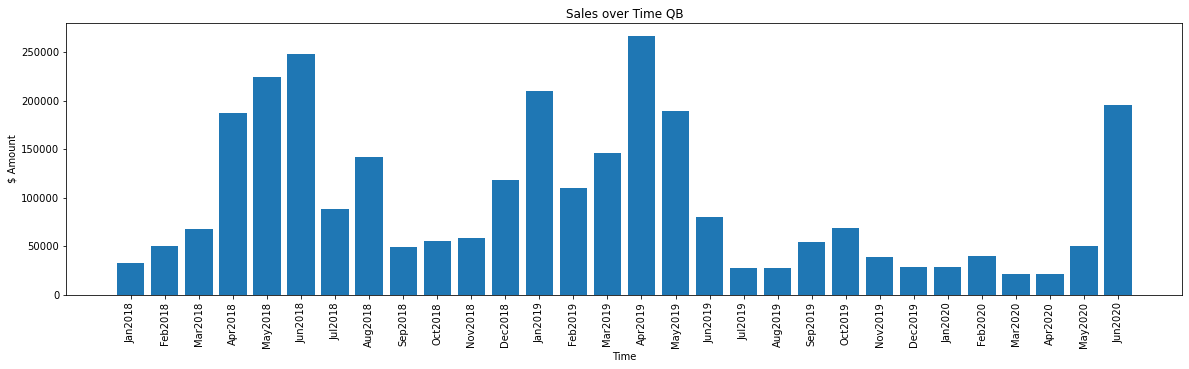

In [49]:
x = np.arange(1,len(sales_amount_qb)+1,1)
y = sales_amount_qb['Amount']
labels = ['Jan2018','Feb2018','Mar2018','Apr2018','May2018','Jun2018','Jul2018','Aug2018','Sep2018','Oct2018','Nov2018','Dec2018','Jan2019','Feb2019','Mar2019','Apr2019','May2019','Jun2019','Jul2019','Aug2019','Sep2019','Oct2019','Nov2019','Dec2019','Jan2020','Feb2020','Mar2020','Apr2020','May2020','Jun2020']
plt.figure(figsize=[20,5])
plt.bar(x,y)
plt.xticks(x,labels,rotation='vertical')
plt.xlabel('Time')
plt.ylabel('$ Amount')
plt.title('Sales over Time QB')
plt.savefig('static/images/analysis_charts/Sales_2020.png',bbox_inches='tight')

#### Top 10 Customers

In [50]:
sum_customers = inventory_df.groupby('Name').sum()

In [51]:
top_10_customers = sum_customers.sort_values(by=['Amount'],ascending=False).iloc[0:10]

In [52]:
top_10_customers.reset_index(inplace=True)

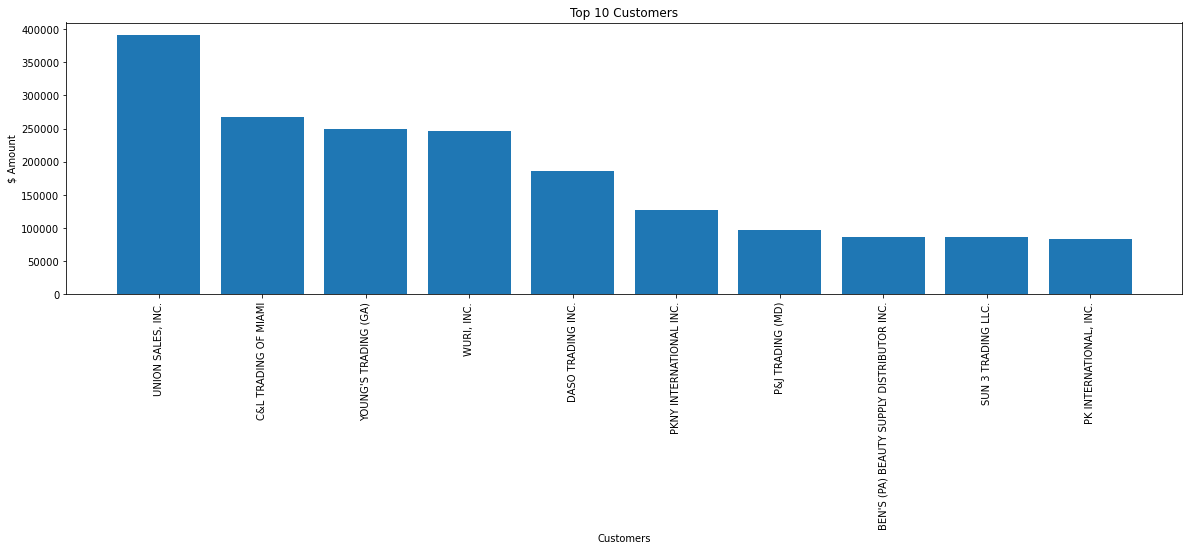

In [53]:
x = top_10_customers['Name']
y = top_10_customers['Amount']
plt.figure(figsize=[20,5])
plt.bar(x,y)
plt.xticks(x,rotation='vertical')
plt.xlabel('Customers')
plt.ylabel('$ Amount')
plt.title('Top 10 Customers')
plt.savefig('static/images/analysis_charts/Top_Customer_Sales.png',bbox_inches='tight')

#### Top 10 Backordered Customers

In [54]:
inventory_df.groupby('Name').sum()

,Qty,Invoiced,Backordered,Amount,Open Balance,Month,Year
Name,,,,,,,
1720 GROCERY STORE,1.0,0.0,1.0,9.0,9.0,5,2018
"2J GROUP, INC.",5213.0,1040.0,4173.0,52701.6,41618.1,2073,660032
4 DEGREEC,30.0,0.0,30.0,450.0,450.0,23,10090
7 DOLLAR BEAUTY SUPPLY,10516.0,1293.0,9223.0,81479.0,72435.0,2159,702434
"A-1 TRADING, INC. (GA)",5880.0,194.0,5686.0,45662.5,44190.5,1913,714571
...,...,...,...,...,...,...,...
XCLUSIVE SALON & SPA,30.0,11.0,19.0,330.0,209.0,16,6057
YASMINE MOTLEY,1.0,0.0,1.0,15.0,15.0,7,2018
YOLANDA BOYD,10.0,0.0,10.0,222.0,222.0,28,12118


In [55]:
top_10_backorders = sum_customers.sort_values(by=['Backordered'],ascending=False).iloc[0:10]

In [56]:
top_10_backorders.reset_index(inplace=True)

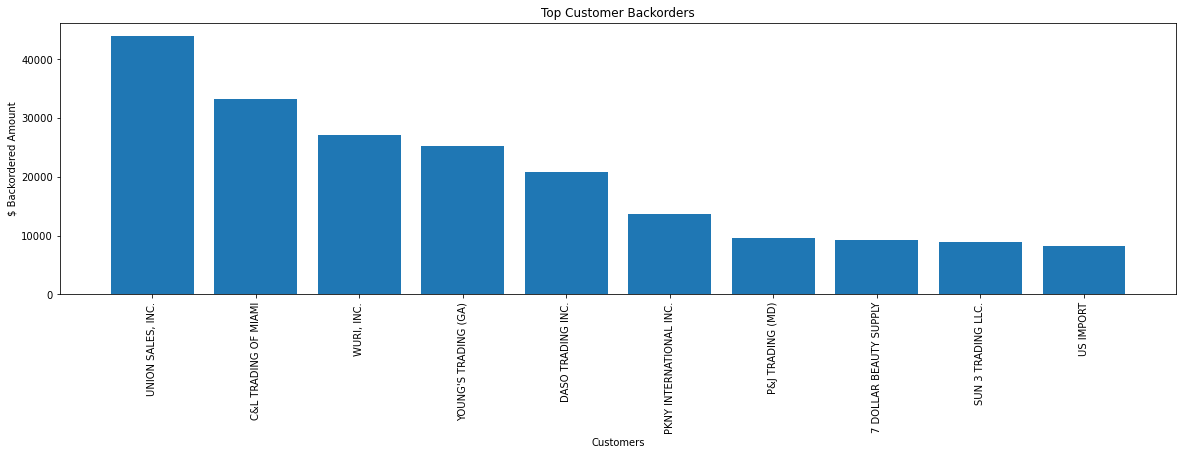

In [57]:
x = top_10_backorders['Name']
y = top_10_backorders['Backordered']
plt.figure(figsize=[20,5])
plt.bar(x,y)
plt.xticks(x,rotation='vertical')
plt.xlabel('Customers')
plt.ylabel('$ Backordered Amount')
plt.title('Top Customer Backorders')
plt.savefig('static/images/analysis_charts/Top_Customer_Backorders.png',bbox_inches='tight')

#### Comparison between Customers' Purchases and Backorders

In [58]:
top_20_customers = sum_customers.sort_values(by=['Amount'],ascending=False).iloc[0:10]

In [59]:
top_20_customers.reset_index(inplace=True)


In [60]:
top_20_customers

,Name,Qty,Invoiced,Backordered,Amount,Open Balance,Month,Year
0,"UNION SALES, INC.",50876.0,6904.0,43972.0,390405.3,334710.95,2633,914334
1,C&L TRADING OF MIAMI,37964.0,4790.0,33174.0,267163.8,234276.30,3018,1162847
2,YOUNG'S TRADING (GA),26344.0,1082.0,25262.0,248894.0,238018.00,7259,2521249
3,"WURI, INC.",29544.0,2531.0,27013.0,246029.5,221136.90,6060,2260885
4,DASO TRADING INC.,21887.0,1121.0,20766.0,186597.1,176136.60,5225,1992354
5,PKNY INTERNATIONAL INC.,21558.0,7910.0,13648.0,127100.2,100987.80,816,244264
6,P&J TRADING (MD),10249.0,673.0,9576.0,97443.5,90930.40,3718,1243612
7,BEN'S (PA) BEAUTY SUPPLY DISTRIBUTOR INC.,8666.0,2200.0,6466.0,86607.0,62462.00,375,155429
8,SUN 3 TRADING LLC.,9235.0,333.0,8902.0,86421.3,83425.80,5204,1869341
9,"PK INTERNATIONAL, INC.",9330.0,1154.0,8176.0,83671.0,72640.10,1049,353252


In [61]:
x=np.arange(0,20,1)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

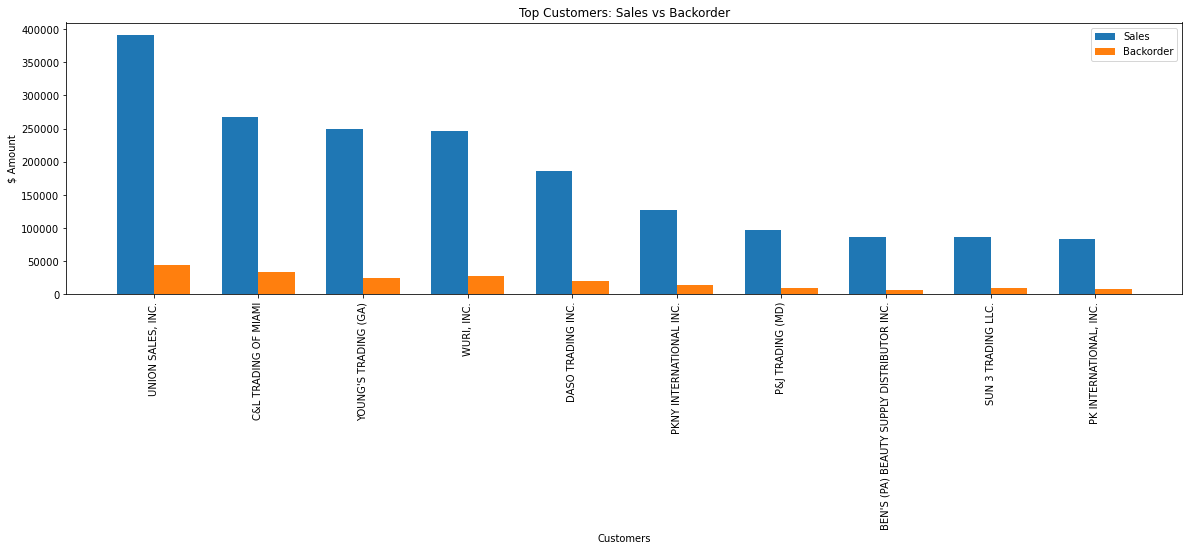

In [62]:
labels = top_20_customers['Name']
backorders = top_20_customers['Backordered']
sales = top_20_customers['Amount']
x=np.arange(0,10,1)
width = 0.35
fig, ax = plt.subplots(figsize=[20,5])
rects1 = ax.bar(x - width/2, sales, width, label='Sales')
rects2 = ax.bar(x + width/2, backorders, width, label='Backorder')
ax.set_xlabel('Customers')
ax.set_ylabel('$ Amount')
ax.set_title('Top Customers: Sales vs Backorder')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation='vertical')
ax.legend()
plt.savefig('static/images/analysis_charts/Top_Customers_Sales_vs_Backorder.png',bbox_inches='tight')

#### Top 10 Items

In [63]:
item_sale_per_date = inventory_df.groupby('Inventory').sum()

In [64]:
top_10_items = item_sale_per_date.sort_values(by=['Amount'],ascending=False).iloc[0:10]
top_10_items.reset_index(inplace=True)

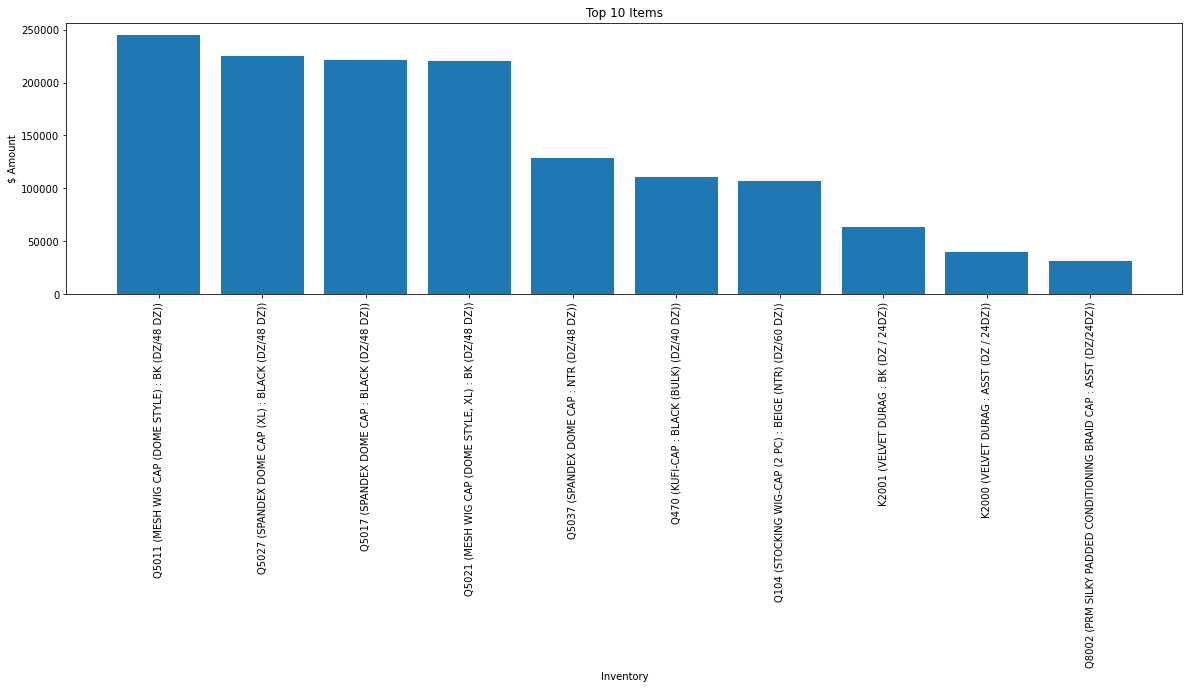

In [65]:
x = top_10_items['Inventory']
y = top_10_items['Amount']
plt.figure(figsize=[20,5])
plt.bar(x,y)
plt.xticks(x,rotation='vertical')
plt.xlabel('Inventory')
plt.ylabel('$ Amount')
plt.title('Top 10 Items')
plt.savefig('static/images/analysis_charts/Top_10_Items.png',bbox_inches='tight')